# Baseball Casestudy

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(30, 17)

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<Axes: >

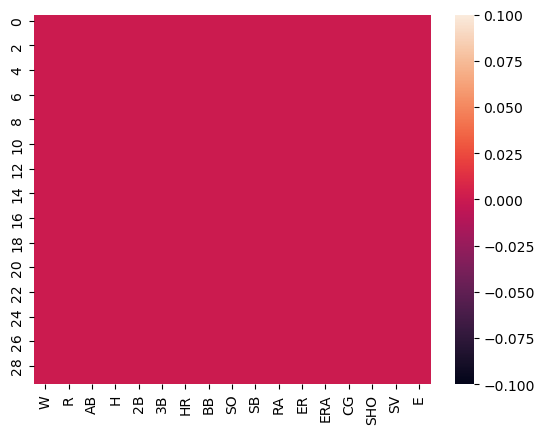

In [12]:
sns.heatmap(df.isnull())

This Heatmap shows us there is no null value present in the dataset

In [13]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Data Visualization

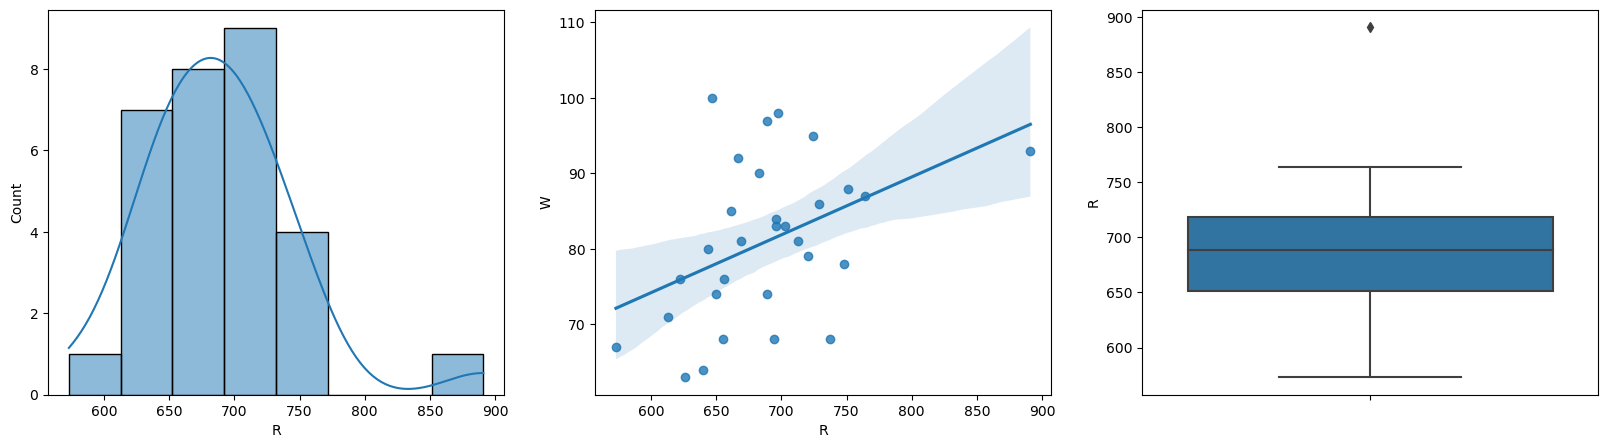

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='R',data=df) 
plt.show()

Run and win are linearly correlated. And outliers are present between 850 and 900

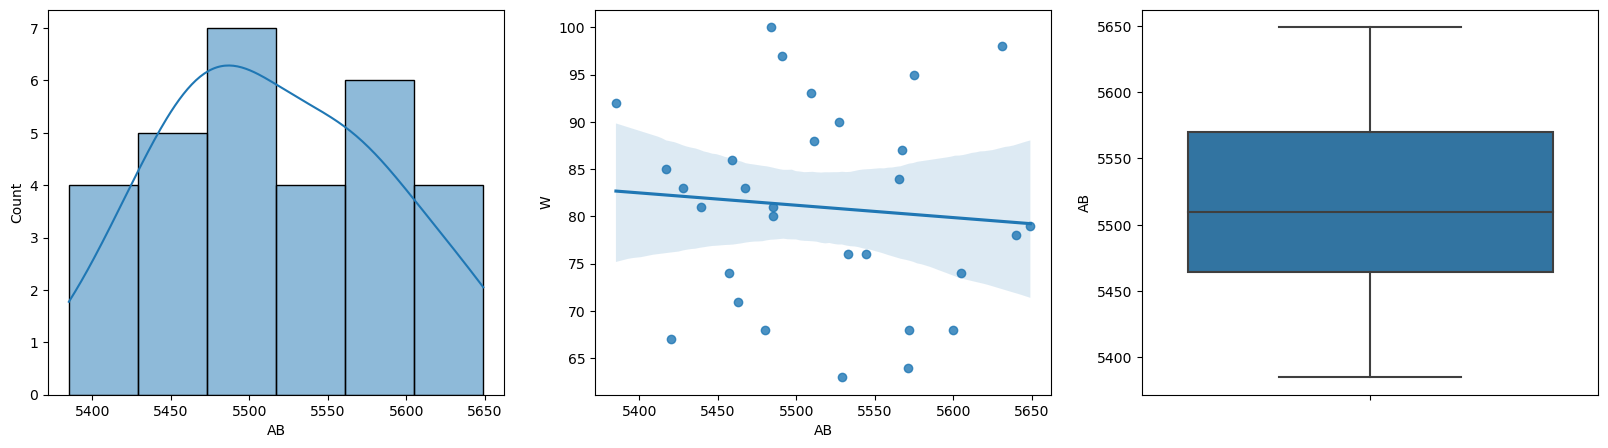

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='AB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='AB',data=df) 
plt.show()

At balls is very weekly corelated to Wins With no outliers.



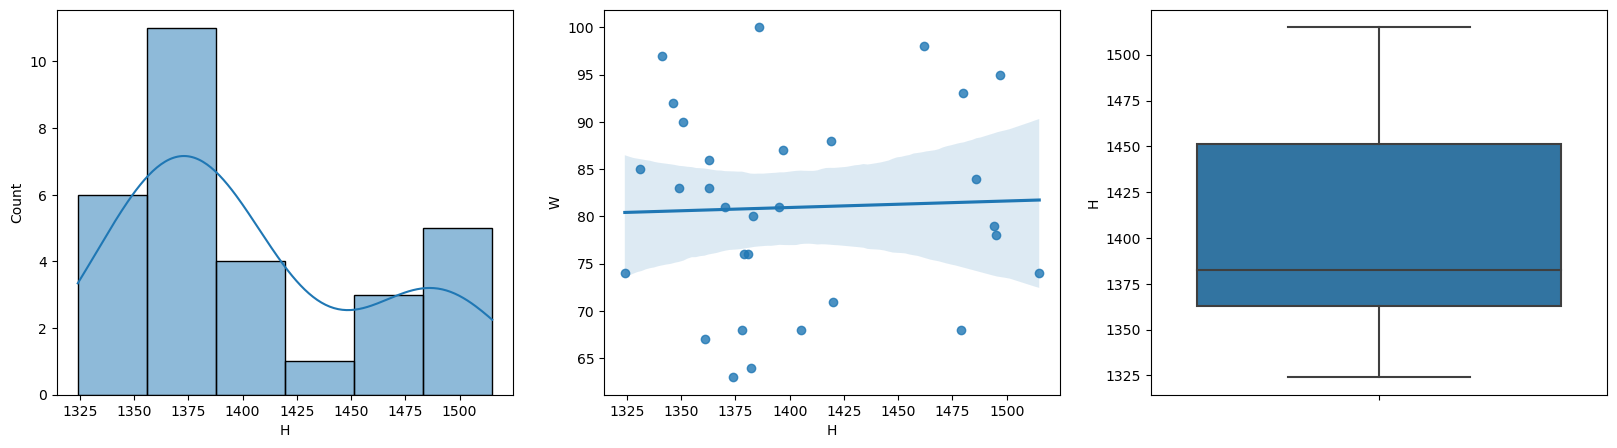

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='H',data=df) 
plt.show()

hits are also very weakly corelated to win with no outliers

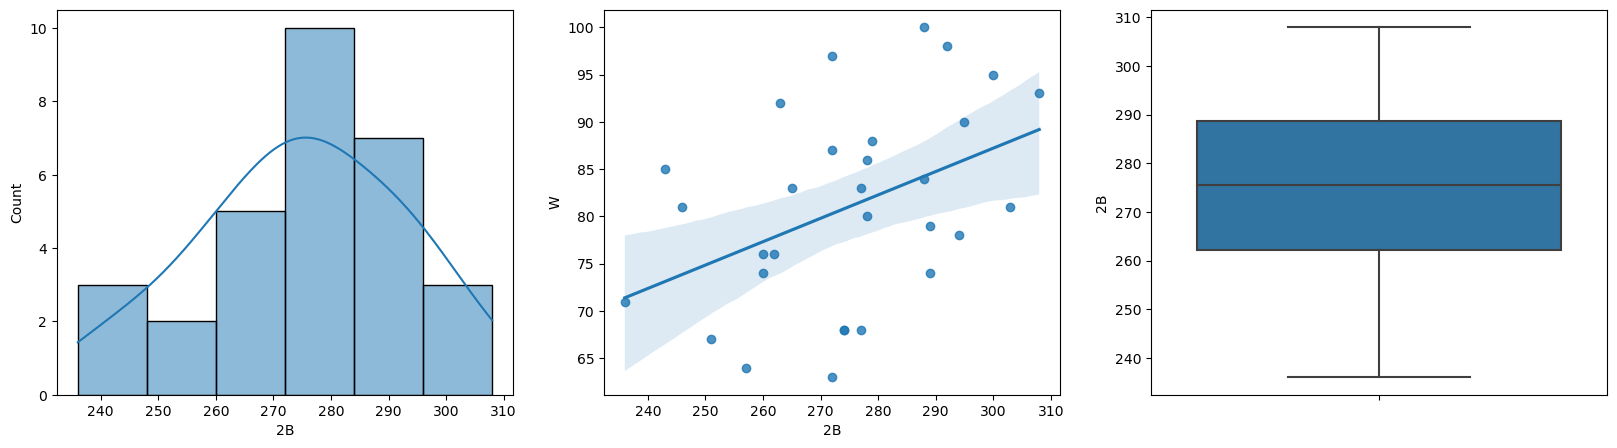

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='2B',data=df) 
plt.show()

doubles are linearly related to wins with no outliers 

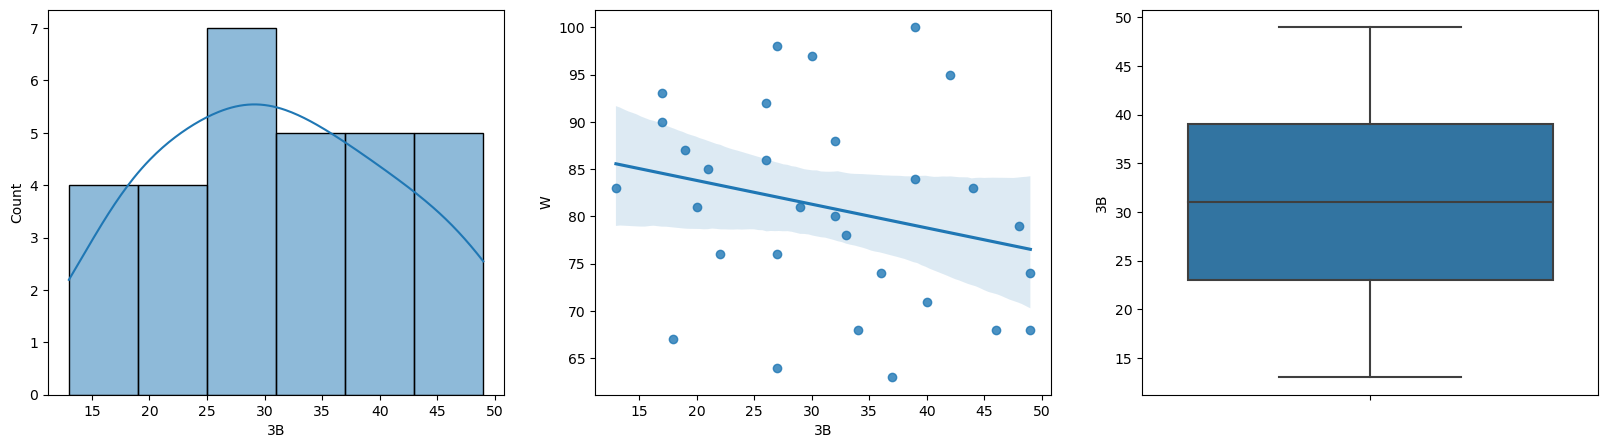

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='3B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='3B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='3B',data=df) 
plt.show()

Triples has very weak negative correlation with win with no outliers

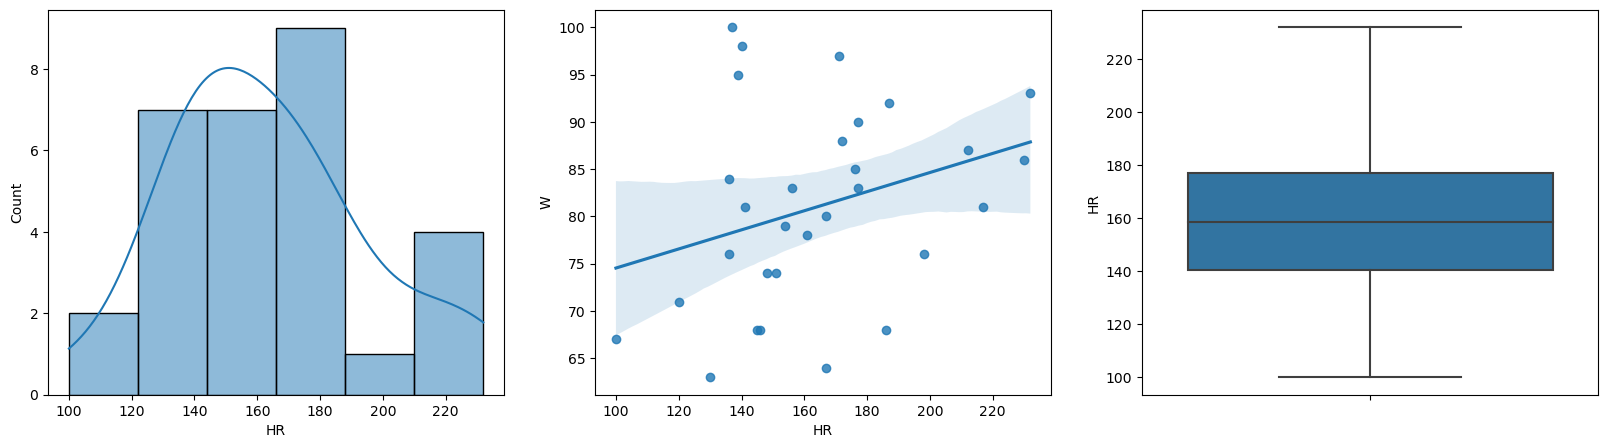

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='HR',data=df) 
plt.show()

Home run also have very weak correlation with win with no outliers 

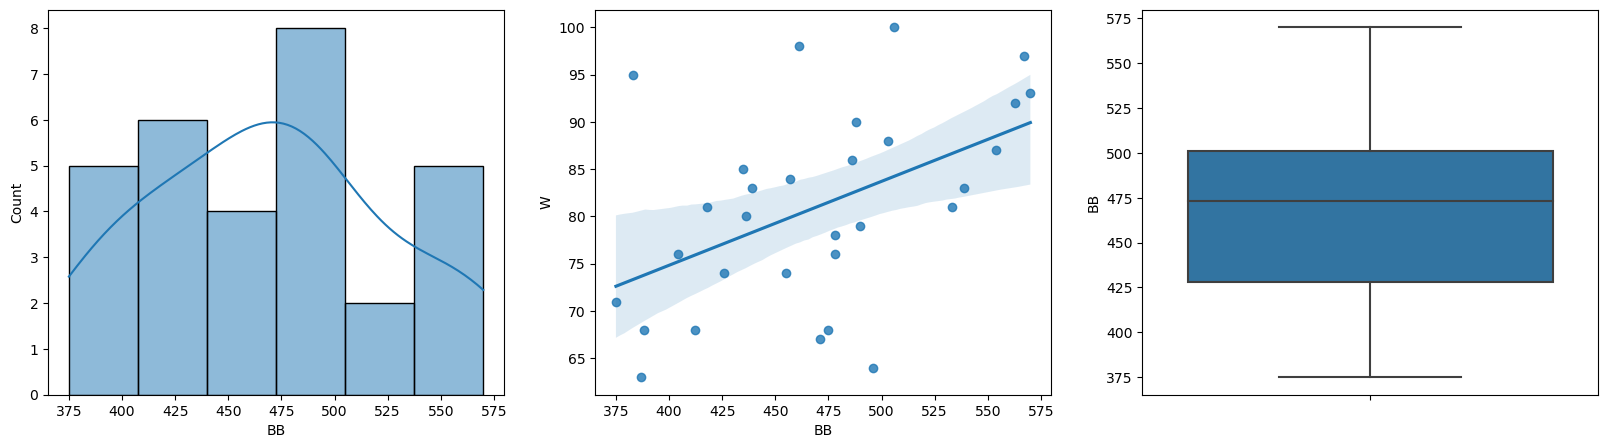

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='BB',data=df) 
plt.show()

Walk is lightly correlated to win with no outlier



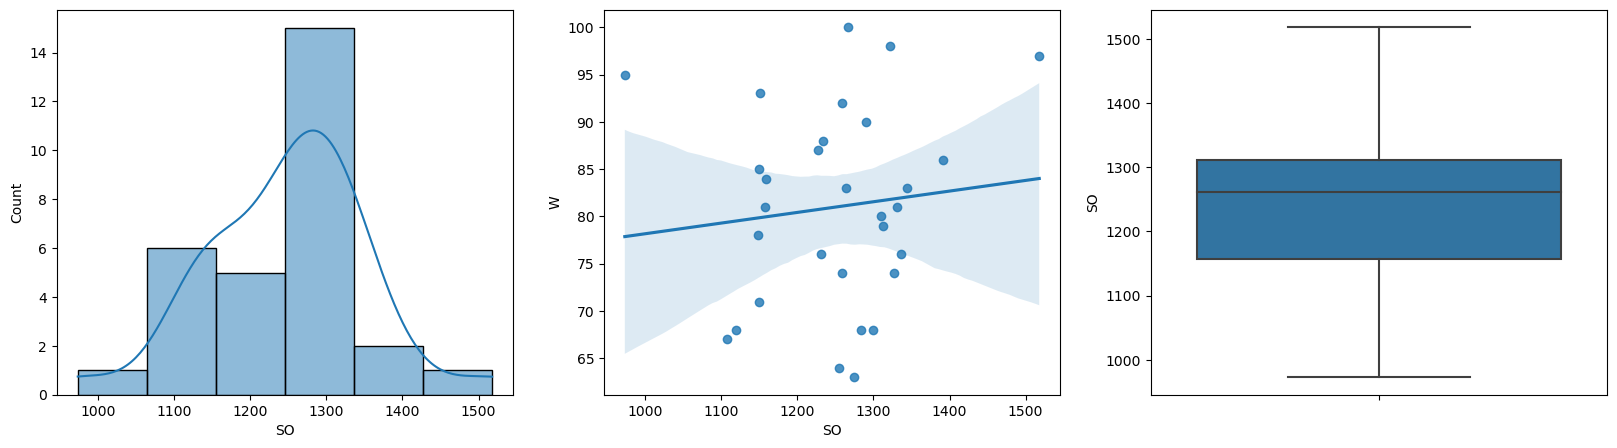

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SO',data=df) 
plt.show()

Strikeout is not correlated to win with no outlier 

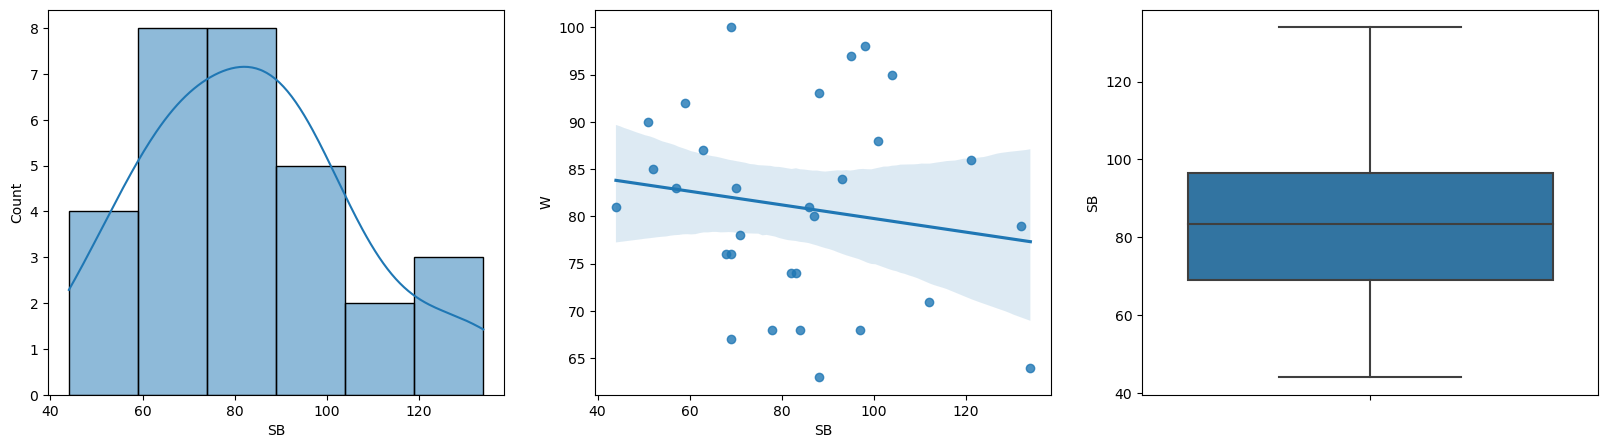

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SB',data=df) 
plt.show()

Stolen Bases is not correlated to win with no outlier

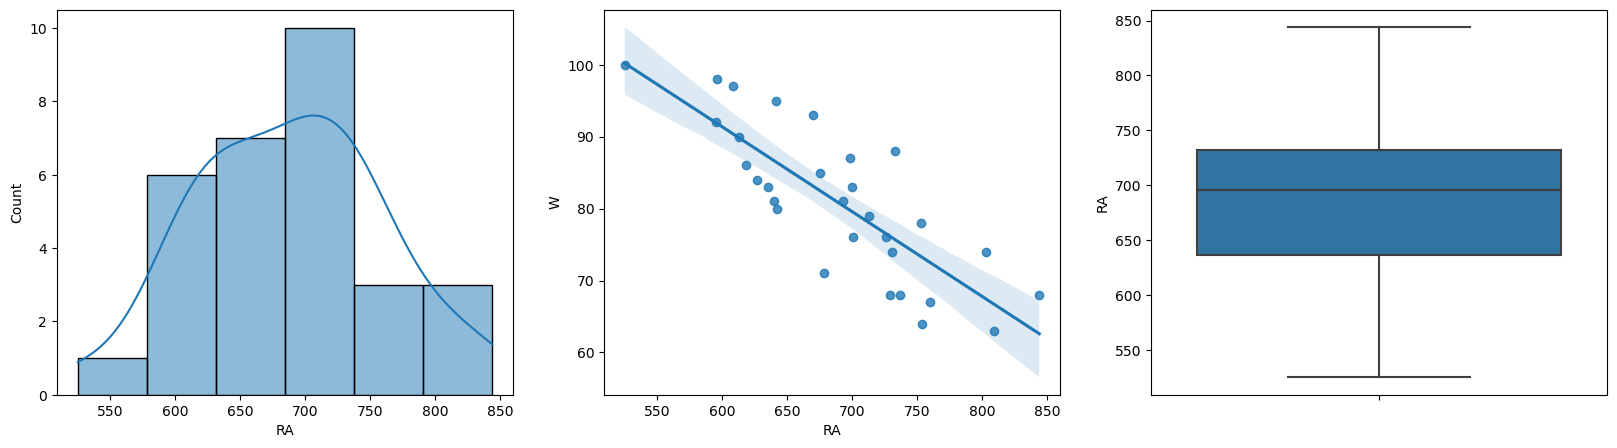

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='RA',data=df) 
plt.show()

Stolen Bases is not correlated to win with no outlier



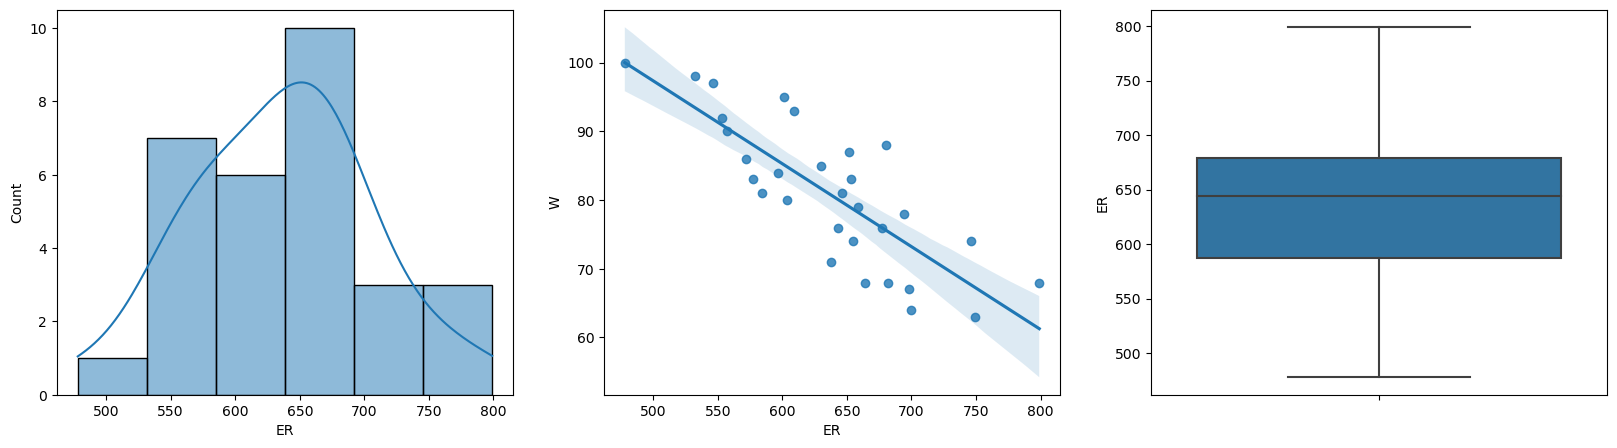

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ER',data=df) 
plt.show()

Runs Allowed is highly correlated to win with no outliers



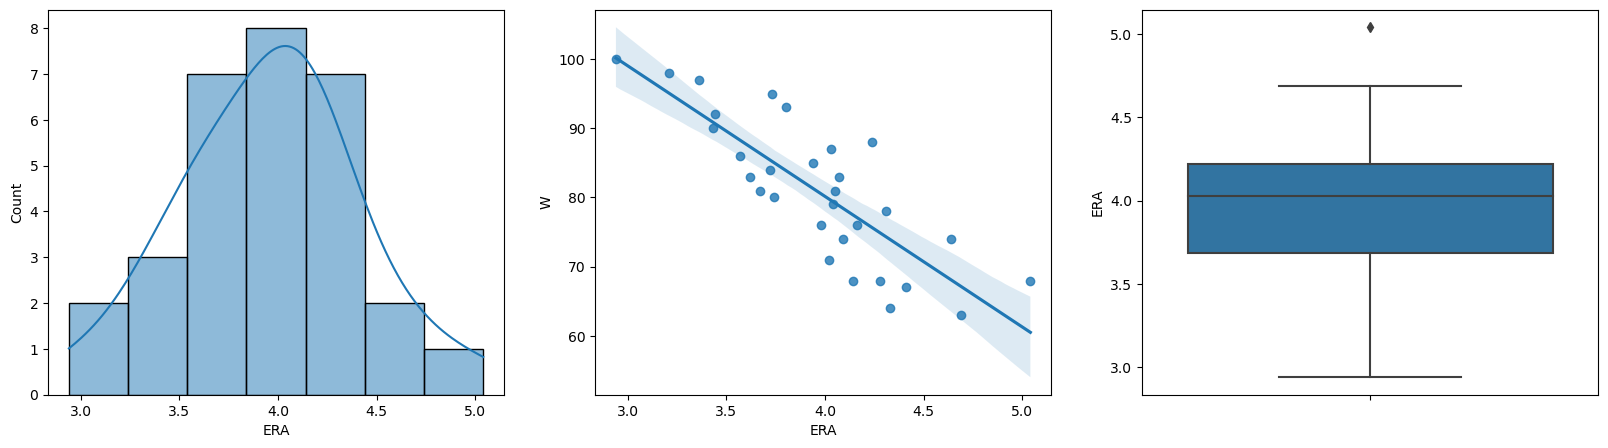

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ERA',data=df) 
plt.show()

Earned Runs is highly correlated to win with no outliers



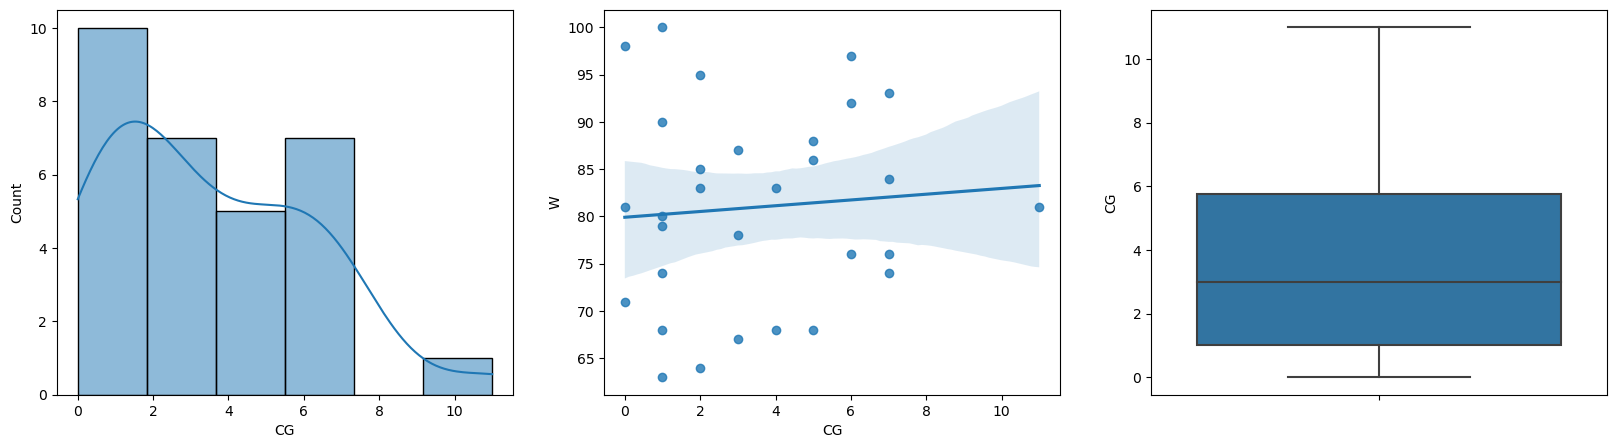

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='CG',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='CG',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='CG',data=df) 
plt.show()

Earned Run Average (ERA) is not correlated to win with no outliers 

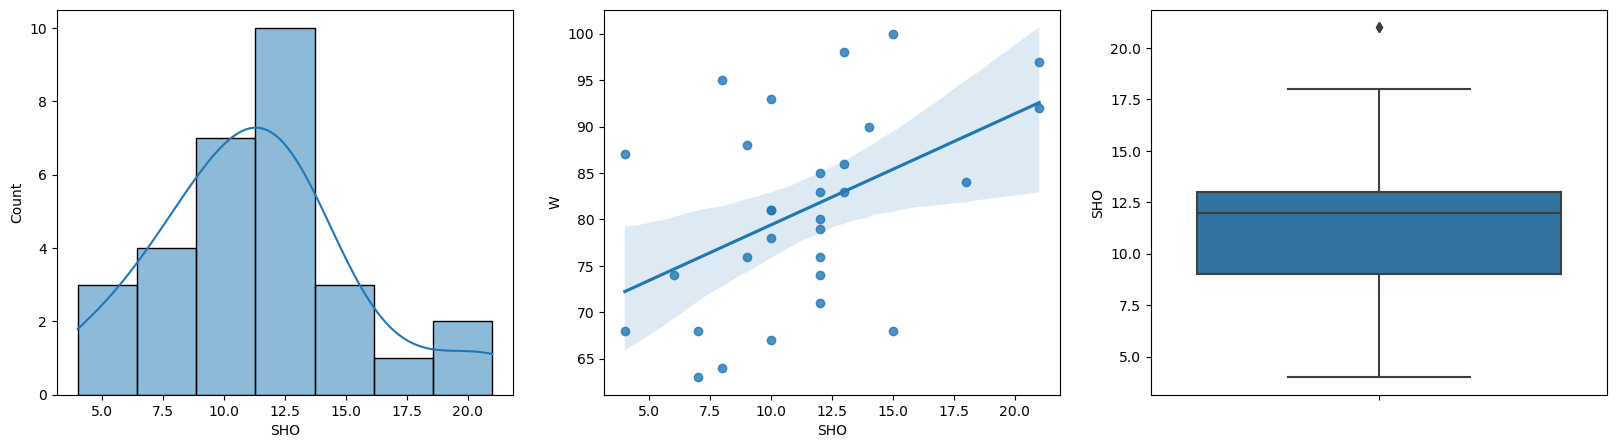

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SHO',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SHO',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SHO',data=df) 
plt.show()

Shutouts are highly correlated to win with no outliers 

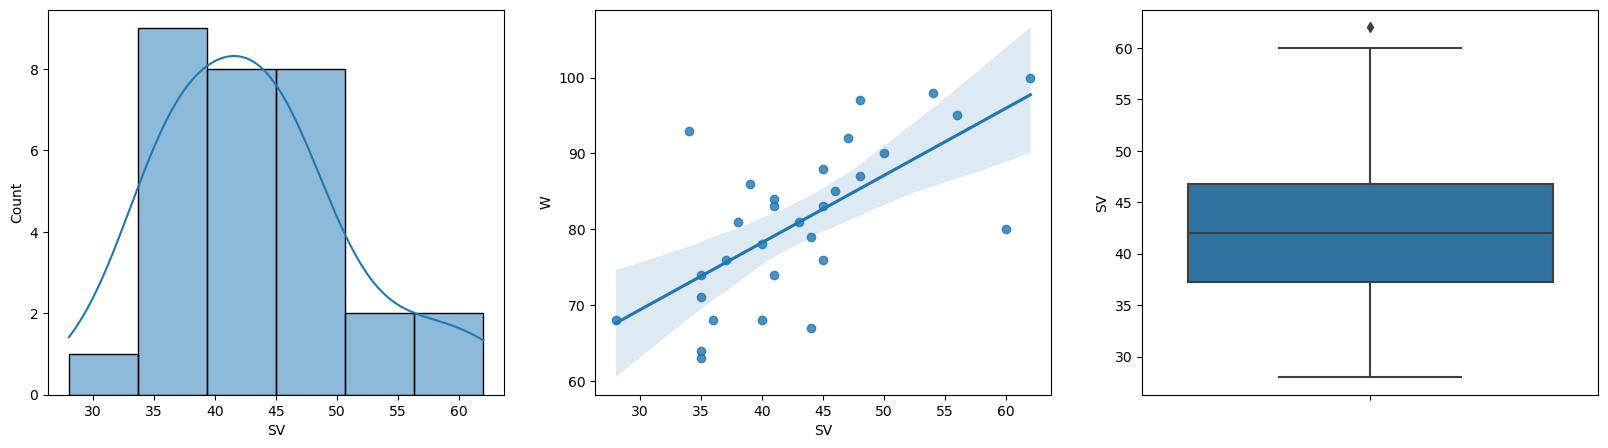

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SV',data=df) 
plt.show()

Saves are lightly correlated to win with no outliers-skewed.



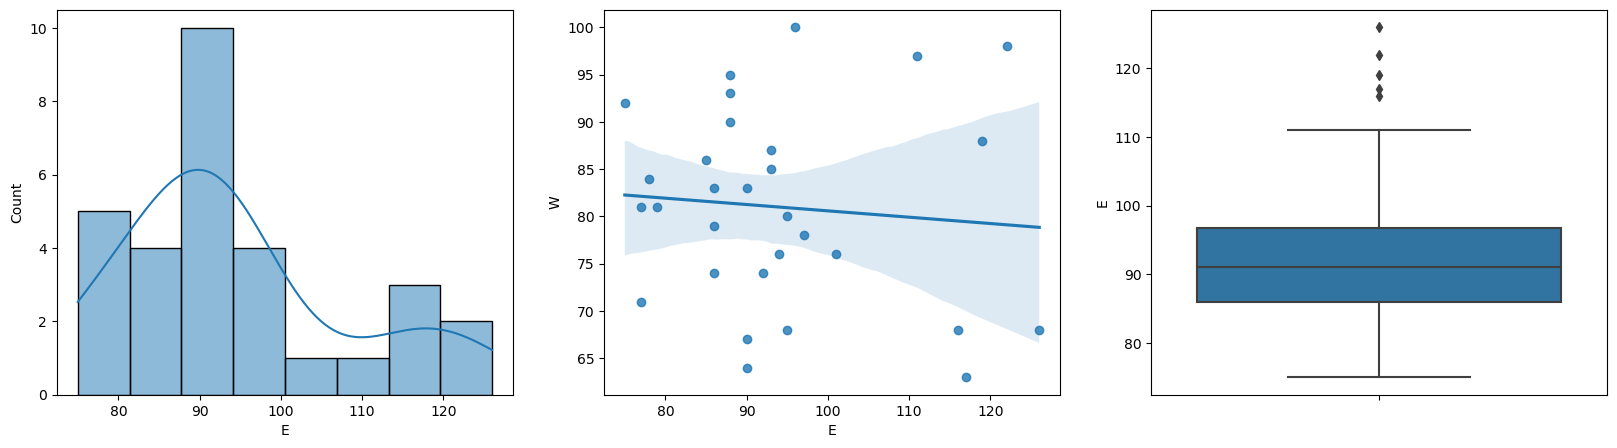

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='E',data=df) 
plt.show()

Errors are not correlated to win, the data has outliers and data is right-skewed.

# Removing the Outliers 

In [31]:
df.shape

(30, 17)

In [32]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [33]:
df.shape

(29, 17)

In [34]:
loss = (30-29)/30*100
loss

3.3333333333333335

In [35]:
X = df.drop('W', axis=1)
Y = df['W']

In [36]:
Y.value_counts()

68     3
81     2
76     2
74     2
83     2
97     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
95     1
98     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
79     1
Name: W, dtype: int64

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.617213,-0.570122,0.211006,1.757915


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4,random_state=111)

In [89]:
def classification_model(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=111)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    prediction = model.predict(X_test)
    
    # Accuracy Score
    score = (accuracy_score(Y_test, prediction))*100
    print("Accuracy Score:",score)
    
    # Classification Report
    report = classification_report(Y_test, prediction)
    print("\nClassification Report:\n",report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=2).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


In [90]:
model = LogisticRegression()
classification_model(model, X, Y)

Accuracy Score: 8.333333333333332

Classification Report:
               precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         2
          71       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       1.00      1.00      1.00         1
          80       0.00      0.00      0.00         0
          81       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         0
          92       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.

In [69]:
model=SVC(C=3,kernel='rbf',gamma='auto',random_state=42)
classification_model(model, X, Y)

Accuracy Score: 8.333333333333332

Classification Report:
               precision    recall  f1-score   support

          67       0.00      0.00      0.00         1
          68       0.25      1.00      0.40         1
          71       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         0
          81       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.

In [70]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classification_model(model, X, Y)

Accuracy Score: 8.333333333333332

Classification Report:
               precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       0.25      1.00      0.40         1
          78       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         0
          81       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         100       0.0

In [72]:
model=RandomForestClassifier(max_depth=75, random_state=42)
classification_model(model, X, Y)

Accuracy Score: 0.0

Classification Report:
               precision    recall  f1-score   support

          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0

    accuracy                       

In [73]:
model=KNeighborsClassifier(n_neighbors=15)
classification_model(model, X, Y)

Accuracy Score: 8.333333333333332

Classification Report:
               precision    recall  f1-score   support

          67       0.00      0.00      0.00         1
          68       0.14      1.00      0.25         1
          71       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.01      0.08      0.02        12
weighted avg       0.01      0.08      0.02        12

Cross Validation Sco

In [74]:
model=ExtraTreesClassifier()
classification_model(model, X, Y)

Accuracy Score: 0.0

Classification Report:
               precision    recall  f1-score   support

          64       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       0.0
          92       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00   

# Hyper Parameter Tuning

In [77]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}
GCV = GridSearchCV(SVC(), svc_param, cv=2)
GCV.fit(X_train,Y_train)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [78]:
GCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [81]:
Final = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=42, shrinking=True, verbose=True)
Classifier = Final.fit(X_train,Y_train)
final_pred = Final.predict(X_test)
fmod_acc = (accuracy_score(Y_test, final_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 8.333333333333332


# Saving the Model

In [82]:
import joblib
filename = "Final_Baseball_Casestudy"
joblib.dump(Final,filename)

['Final_Baseball_Casestudy']